In [ ]:
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255)
train_it = datagen.flow_from_directory('../data/train/',
                                       class_mode='binary',
                                       target_size = (256,256),
                                       color_mode = 'grayscale',
                                       batch_size = 5217)
val_it = datagen.flow_from_directory('../data/val/',
                                     class_mode='binary',
                                     target_size = (256,256),
                                     color_mode = 'grayscale',
                                     batch_size = 16)
test_it = datagen.flow_from_directory('../data/test/',
                                      class_mode='binary', 
                                      target_size = (256,256),
                                      color_mode = 'grayscale',
                                      batch_size = 624)

batchX_train, batchY_train = train_it.next()
batchX_train = batchX_train.reshape(5217, 65536)

batchX_val, batchY_val = val_it.next()
batchX_val = batchX_val.reshape(16,65536)

batchX_test, batchY_test = test_it.next()
batchX_test = batchX_test.reshape(624,65536)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten

In [ ]:
batchX_train.shape

In [ ]:
model = models.Sequential()
model.add(Dense(100, activation = 'relu', input_shape=(65536,)))
model.add(Dropout(0.2))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(batchX_train,
                    batchY_train,
                    epochs=5,
                    batch_size = 32,
                    validation_data=(batchX_val, batchY_val))
score = model.evaluate(batchX_test, batchY_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.summary()

## CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
datagen = ImageDataGenerator(rescale = 1./255)
train_it = datagen.flow_from_directory('../data/train/',
                                       class_mode='binary',
                                       target_size = (64,64),
#                                        color_mode = 'grayscale',
                                       batch_size = 5217, 
                                       seed = 1)
val_it = datagen.flow_from_directory('../data/val/',
                                     class_mode='binary',
                                     target_size = (64,64),
#                                      color_mode = 'grayscale',
                                     batch_size = 16,
                                     seed = 1)
test_it = datagen.flow_from_directory('../data/test/',
                                      class_mode='binary', 
                                      target_size = (64,64),
#                                       color_mode = 'grayscale',
                                      batch_size = 624,
                                      seed = 1)
#split images and labels
X_train, y_train = train_it.next()
X_val, y_val = val_it.next()
X_test, y_test = test_it.next()

Found 5217 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
y_train = np.reshape(y_train[:,], (5217,1))
y_val = np.reshape(y_val[:,], (16,1))
y_test = np.reshape(y_test[:,], (624,1))

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
cnn1 = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size = 32,
                    validation_data=(X_val, y_val))


Epoch 1/5
164/164 [==============================] - 14s 83ms/step - loss: 0.3134 - accuracy: 0.8670 - val_loss: 0.6945 - val_accuracy: 0.6875
Epoch 2/5
164/164 [==============================] - 14s 83ms/step - loss: 0.1397 - accuracy: 0.9438 - val_loss: 0.5681 - val_accuracy: 0.7500
Epoch 3/5
164/164 [==============================] - 14s 85ms/step - loss: 0.1111 - accuracy: 0.9584 - val_loss: 0.5239 - val_accuracy: 0.7500
Epoch 4/5
164/164 [==============================] - 13s 81ms/step - loss: 0.0912 - accuracy: 0.9659 - val_loss: 1.0445 - val_accuracy: 0.6250
Epoch 5/5
164/164 [==============================] - 12s 73ms/step - loss: 0.0765 - accuracy: 0.9709 - val_loss: 0.4804 - val_accuracy: 0.7500


In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8759942650794983
Test accuracy: 0.7532051205635071


### Plots

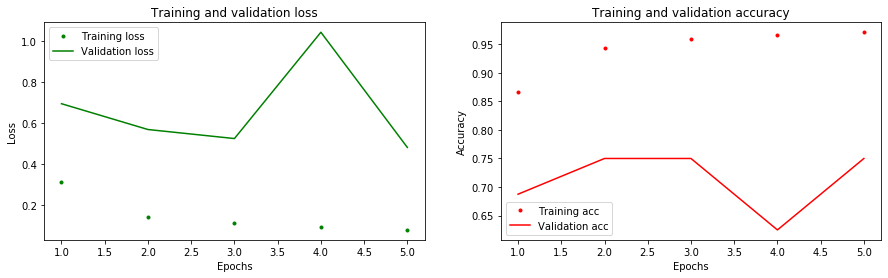

In [22]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()